In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m

1.	Сгенерировать 10^3 значений стандартной случайной величины.
2.	Построить график винеровского процесса для моментов t из интервала 0 ≤ t ≤ 4 года с шагом h=4x10-3.


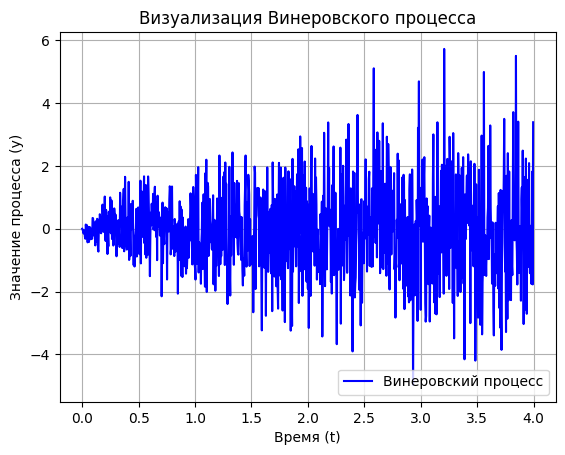

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

def generate_wiener_process(num_points=1000, time_step=0.004):
    """
    Генерирует Винеровский процесс.

    :param num_points: Количество точек в процессе
    :param time_step: Шаг времени между точками
    :return: Массивы временных точек и значений Винеровского процесса
    """
    random_variable = np.random.standard_normal(10**3)
    winner_values = np.zeros(num_points)
    time_points = np.zeros(num_points)

    for i in range(num_points):
        time_points[i] = i * time_step
        if i == 0:  # В начальный момент времени значение процесса равно 0
            winner_values[i] = 0
        else:
            winner_values[i] = random_variable[i] * math.sqrt(time_points[i])

    return time_points, winner_values

def plot_wiener_process(time_points, winner_values, title):
    """
    Визуализирует Винеровский процесс.

    :param time_points: Массив временных точек
    :param winner_values: Массив значений Винеровского процесса
    """
    plt.plot(time_points, winner_values, color='blue', markersize=1, label="Винеровский процесс")
    plt.xlabel('Время (t)')
    plt.ylabel('Значение процесса (y)')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

# Пример использования функций
time_points, winner_values = generate_wiener_process()
plot_wiener_process(time_points, winner_values, title='Визуализация Винеровского процесса')


3.	Построить и изобразить реализацию винеровского процесса как случайное блуждание: пусть xk – СВ, имеющая биномиальное распределение и принимающая значения ± 1 с одинаковыми вероятностями p = 0.5 и q = 0.5. Пусть N – число таких случайных величин. Тогда  Wt = sum(xi)/sqrt(N), 0 ≤ t ≤ N,  для некоторого момента времени t, общий интервал времени T = 1 (узел t = N). Для отрисовки использовать N = 104¬¬¬ величин, задействовать функцию pause в Matlab, чтобы график винеровского процесса выводился в реальном времени. 

In [16]:
def generate_random_walk(N=10000):
    """
    Генерирует случайное блуждание и соответствующий Винеровский процесс.

    :param N: Количество шагов в случайном блуждании
    :return: Массивы временных точек и значений Винеровского процесса
    """
    x = np.random.choice([-1, 1], size=N)
    winner_values = np.cumsum(x) / np.sqrt(N)
    time_points = np.arange(N)
    return time_points, winner_values

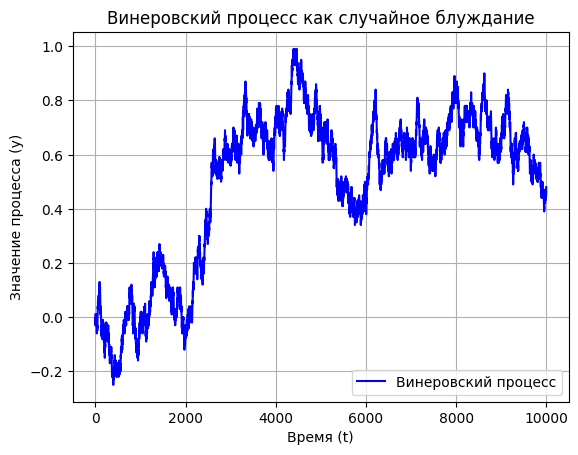

In [17]:
time_points, winner_values = generate_random_walk()
plot_wiener_process(time_points, winner_values, title='Винеровский процесс как случайное блуждание')

4.	В соответствии с номером варианта сгенерировать процесс ценообразования рискового актива по формуле (не забудьте перевести волатильность в исходном задании в доли)
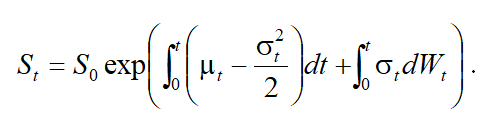

Интегралы вычислять численно методом трапеций и Монте-Карло для первого и второго интегралов соответственно с погрешностью не ниже 10-2 и вероятностью не ниже 0,95. Последовательно положить моменты времени равными t=0,5;1;…; 4 года.


Процесс ценообразования рискового актива:
[  35.          184.65617682  104.97479202   47.32364511  294.84027515
   67.34219779   13.9566969  2877.0659812     8.34921514]
Процесс ценообразования облигации:
[35.         34.56522302 33.29302986 31.27590715 28.65557636 25.60654701
 22.31698531 18.9697966  15.72651374]


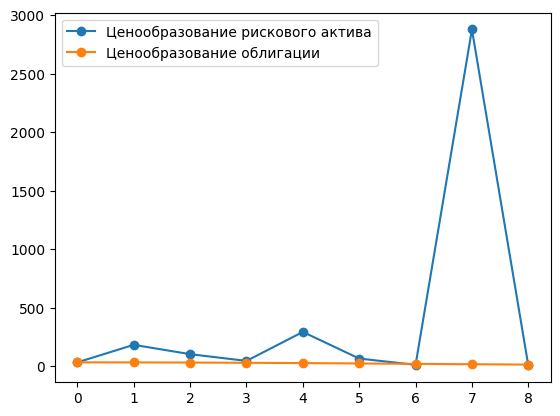

In [29]:
import numpy as np
import matplotlib.pyplot as plt

s0 = 35
e = 0.01
N = 1 / (4 * e**2 * (1 - 0.95))
maxpr = 0.000225

def mu(t):
    return -0.1 * t

def sigma(t):
    return np.exp(t/100)

def I1(t):
    return 0.05 * t - ((0.015 * t + 0.04)**2) / 2

t = np.zeros(8)
Nj = np.zeros(8)
delta = np.zeros(8)
i1 = np.zeros(8)
i2 = np.zeros(8)
i3 = np.zeros(8)
St = np.zeros(9)
St[0] = s0
Bt = np.zeros(9)
Bt[0] = s0

for i in range(8):
    t[i] = 0.5 * (i + 1)
    Nj[i] = (i + 1) * N / 8
    delta[i] = (maxpr * t[i]**3) / (12 * 4)
    h = t[i] / 2
    i1[i] = h / 2 * (I1(0) + 2 * I1(h) + I1(2 * h))
    mmk = 0
    for j in range(int(Nj[i])):
        mmk += sigma(t[i] * np.random.rand())
    i2[i] = (np.sqrt(t[i]) / Nj[i]) * mmk * np.random.normal(0, 1)
    St[i + 1] = s0 * np.exp(i1[i] + i2[i])
    i3[i] = h / 2 * (mu(0) + 2 * mu(h) + mu(2 * h))
    Bt[i + 1] = s0 * np.exp(i3[i])

print('Процесс ценообразования рискового актива:')
print(St)
print('Процесс ценообразования облигации:')
print(Bt)

plt.figure(1)
plt.plot(range(9), St, '-o', label='Ценообразование рискового актива')
plt.plot(range(9), Bt, '-o', label='Ценообразование облигации')
plt.legend(loc='best')
plt.show()
